In [ ]:
'''
* A differential equation is an equation that relates the derivative(s)
  of a function to itself.

* An analytical solution of a differential equation is a function which
  when substituted into the differential equation creates a tautology.

* A numerical solution to a differential equation is a list of ordered 
  pairs that gives a point-wise approximation to the actual solution.

* Euler's Method for solving Ordinary Differential Equations:
  Consider an ordinary linear differential equation of the form
  y'(x) = f(x, y)
  We will replace the derivative as a difference equation
  (y(x + h) - y(x)) / h = f(x, y)
  y(x + h) = y(x) + h * f(x, y)

  We will start with an initial value of (x0, y0) and then compute
  x1 = x0 + h
  y1 = y0 + h * f(x0, y0)

  x2 = x1 + h
  y2 = y1 + h * f(x1, y1)

  We then compute subsequent pairs of values similarly.
'''

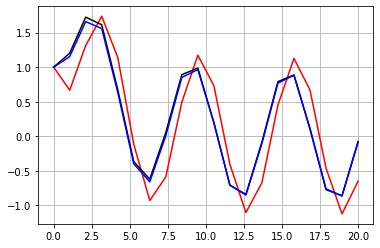

1 [ 0.         -0.48592765 -0.34529035  0.17786538  0.50418498  0.28191488
 -0.27116249 -0.59528518 -0.35816904  0.20714324  0.53626117  0.30257142
 -0.2532815  -0.56632313 -0.31747058  0.24449177  0.55416257  0.30036622
 -0.25964206 -0.55977706]
[ 0.          0.04905344  0.06443906  0.05375576  0.03634476  0.03022499
  0.03785562  0.04600503  0.04045167  0.02106169  0.00227013 -0.00136365
  0.01015187  0.02219097  0.02018932  0.00425391 -0.01103252 -0.01140997
  0.00259724  0.01615383]


In [38]:
import numpy as np
import matplotlib.pyplot as plt
  
def euler_1d (f, x0, y0, xmax, h): 
    # set up the domain of the function between x0, xmax, and h
    x = np.linspace(x0, xmax, int((xmax - x0) / h))
    
    # zero out the range of the function for the given domain
    y = np.zeros_like (x)

    # fill in the initial conditions
    x[0] = x0
    y[0] = y0

    # now compute the range using Euler's approximation
    for i in range (1,len(y)):
        y[i] = y[i-1] + h * f(x[i-1],y[i-1])

    # return the solution
    return x, y

def euler_midpoint (f, x0, y0, xmax, h): 
    # set up the domain of the function between x0, xmax, and h
    x = x = np.linspace(x0, xmax, int((xmax - x0) / h))

    # zero out the range of the function for the given domain
    y = np.zeros_like (x)

    # fill in the initial conditions
    x[0] = x0
    y[0] = y0

    # now compute the range using Euler's approximation
    for i in range (len(y)-1):
        m_n = f(x[i], y[i])
        y_temp = y[i] + (h/2) * m_n
        y[i+1] = y[i] + h * f(x[i] + h/2, y_temp)

    # return the solution
    return x, y

def main():
    # define your function f(x, y) as a lambda function
    # specify x even if x does not show up in f(x, y)
    f = lambda x, y: -y/3 + np.sin(x) 

    # specify the initial conditions
    x0 = 0
    y0 = 1

    # specify the max in your domain
    xmax = 20

    # specify the increment in x
    dx = 1

    # get the solution of the differential equation
    x, y = euler_1d (f, x0, y0, xmax, dx)
    x2, y2 = euler_midpoint (f, x0, y0, xmax, dx)

    # display the  numerical solution
    plt.plot (x, y, 'red')
    plt.plot (x2, y2, 'black')

    # for the vector (domain) x get the analytical range y_actual
    y_actual = (1/10) * (19 * np.e**(-x/3) + 3 * np.sin(x) - 9 * np.cos(x))

    # display the analytical solution
    plt.plot (x, y_actual, 'blue')

    plt.grid()
    plt.show()

    # estimate the error of your numerical solution
    # obtain the root-mean-square of your residuals (y - y_actual)
    std = y - y_actual
    std2 = y2 - y_actual

    # print both dx and std to the same precision for comparison
    print(dx, std)
    print(std2)
main()